In [34]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=False)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code


<h1>Make Jupyter even more magical</h1>

<h1>(with cell magic extensions!)</h1>

<h1>by Nicolas Kruchten, from Datacratic</h1>

%%html
<img src="http://nicolas.kruchten.com/datacratic.png" width="200" />
<ul>
<li>Datacratic is Democratizing Machine Learning through the Machine Learning Database (http://mldb.ai/)</li>
    <li>Based in Montreal, founded in 2010, venture-funded, 30 employees</li>
<li>Jupyter is shipped as part of MLDB as the main interface</li>
    </ul>


<br><br><br><br><br><br>

<h1> Intro to Jupyter<h1>

    <h4>First things first, you can run Python code in Jupyter.</h4>

<h5>Objects and functions stick around from cell to cell: I can define a function here...</h5>

In [6]:
def do_stuff():
    print("Hello again!")

<h5>...and call it there.</h5>

In [7]:
do_stuff()

Hello again!


Inspecting objects is easy too.

In [8]:
import requests
requests?

## Markdown cells

This is a Markdown cell.

* this is a list item
* and another

<br/><br/><br/><br/><br/>

## Time for some Magic!

Lines and cells that start with `%` are not interpreted like normal Python code: they are magical. Let's try a simple one first which will show us what magic is available.

In [9]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

In [10]:
%ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 6013-6863

 Directory of C:\Users\manu\Documents\GitHub\project

08-04-2020  22:40    <DIR>          .
08-04-2020  22:40    <DIR>          ..
08-04-2020  14:27               227 .bash_logout
08-04-2020  14:27             3,888 .bashrc
08-04-2020  14:27    <DIR>          .cache
08-04-2020  14:27    <DIR>          .config
08-04-2020  22:40    <DIR>          .ipynb_checkpoints
08-04-2020  18:37               109 .jovianrc
08-04-2020  14:27    <DIR>          .local
08-04-2020  15:01                47 .nbinteract.json
08-04-2020  14:27               834 .profile
08-04-2020  16:21                25 _config.yml
08-04-2020  22:38             3,181 code_to_paste.txt
08-04-2020  22:40           206,288 jupyter_magic.ipynb
08-04-2020  22:38            13,985 mps.csv
08-04-2020  16:21             1,314 README.md
08-04-2020  13:07                29 requirements.txt
08-04-2020  18:37           320,998 tutorial.html
08-04-2020  22:34         

In [11]:
%time print "Do you have the time?"

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("Do you have the time?")? (<unknown>, line 1)

In [12]:
%%timeit
x = 0
for i in xrange(10): x += i

NameError: name 'xrange' is not defined

In [13]:
%%bash

curl http://localhost:5000/get

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
curl: (7) Failed to connect to localhost port 5000: Connection refused


CalledProcessError: Command 'b'\ncurl http://localhost:5000/get\n'' returned non-zero exit status 7.

## First big idea of this talk: Jupyter cells are not just for Python!

<br/><br/><br/><br/><br/>

## Third-party Magic

Those were all built-in magics, but we can install and load third-party magic extensions too.

In [14]:
%load_ext sql

ModuleNotFoundError: No module named 'sql'

In [15]:
%sql sqlite://

UsageError: Line magic function `%sql` not found.


In [16]:
%%sql

DROP TABLE IF EXISTS hockey;
CREATE TABLE hockey ("Team", "Stanley Cups Won", "Country");
INSERT INTO hockey VALUES ("Montreal Canadiens", 24, "Canada");
INSERT INTO hockey VALUES ("Detroit Red Wings", 11, "USA");
INSERT INTO hockey VALUES ("Boston Bruins", 6, "USA");
INSERT INTO hockey VALUES ("Chicago Blackhawks", 11, "USA");
INSERT INTO hockey VALUES ("Toronto Maple Leafs", 13, "Canada");

UsageError: Cell magic `%%sql` not found.


In [17]:
%sql SELECT * FROM hockey ORDER BY "Stanley Cups Won" DESC LIMIT 3

UsageError: Line magic function `%sql` not found.


Whoa, what happened there? That's not text, that's HTML!

The answer is that when displaying an object, Jupyter tries to get an HTML representation of that object from a method called `_repr_html_` if it exists. Any object with such a method gets displayed this way.

In [18]:
class Thing():
    def _repr_html_(self):
        return """<h3 style="color: blue; text-align: center;">I am a blue thing</h3><br/>"""

thing = Thing()
thing

## Second big idea of this talk: `_repr_html_()` to control Notebook output

<br/><br/><br/><br/><br/>

## Going visual with Matplotlib

The `matplotlib` cell magic lets us tell Jupyter we want to see charts inline with the notebook.

In [19]:
%matplotlib inline

We can also capture the output of a cell magic and assign it to a variable, like so.

In [20]:
data = %sql SELECT * FROM hockey WHERE country='Canada' 

data.pie()
None

UsageError: Line magic function `%sql` not found.


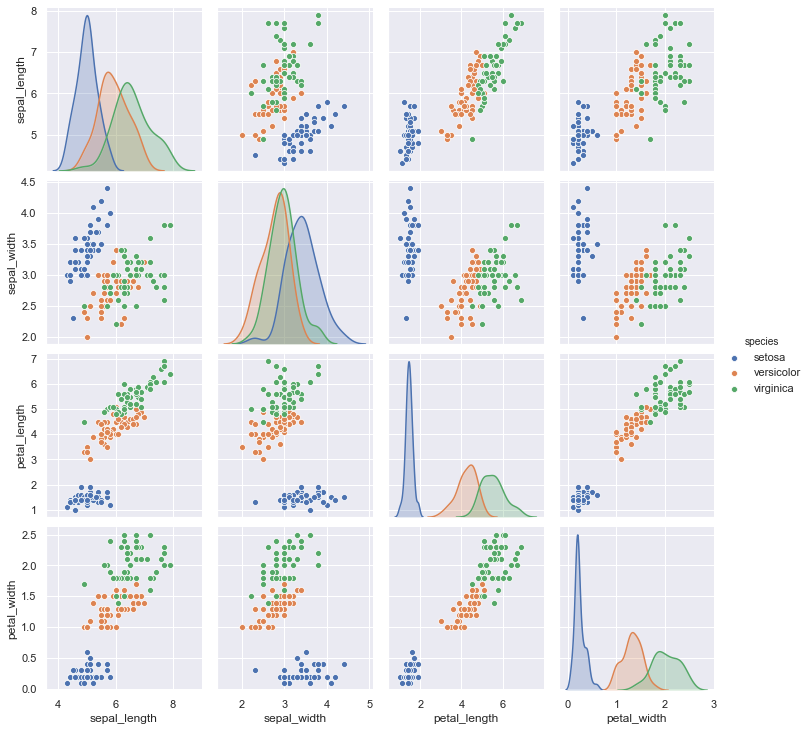

In [22]:
import seaborn as sns
sns.set()

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

## Interactive Data Exploration with PivotTable.js

(Shameless plug: I am the author of PivotTable.js and the `pivottablejs` Python module)

In [25]:
import pandas as pd
df = pd.read_csv("mps.csv")
df.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 7: invalid start byte

In [26]:
df.pivot_table(index="Party", columns="Province", aggfunc=len, values="Name")

KeyError: 'Name'

In [27]:
from pivottablejs import pivot_ui
pivot_ui(df)

ModuleNotFoundError: No module named 'pivottablejs'

## Making diagrams with Graphviz

In [48]:
%load_ext hierarchymagic

The hierarchymagic extension is already loaded. To reload it, use:
  %reload_ext hierarchymagic


In [29]:
%%dot 

digraph G { 
    rankdir=LR;
    hello -> world;
    goodbye -> cruel -> world;
    world -> of -> warcraft;
}


UsageError: Cell magic `%%dot` not found.


## Interactive forms

In [50]:
from ipywidgets import interact

@interact
def echo(input="Hello, world!", times=[1,5,1]):
    return (input+" ")*times

u'Hello, world! Hello, world! Hello, world! '

In [30]:
import matplotlib.pyplot as plt

@interact
def polynomial(split=[0,100]):
    plt.pie([split/100.0, 1.0-split/100.0], labels=["Montreal Canadiens", "Toronto Maple Leafs"])
    plt.show()

NameError: name 'interact' is not defined

<br/><br/><br/><br/><br/>

## So let's make our own extension!

Here I'll switch to Jupyter's built-in text editor. Oh yeah, Jupyter has a built-in text editor! And a web-based terminal. (Yes, this is a giant security hole :)

In [52]:
%load_ext sample_ext

The sample_ext extension is already loaded. To reload it, use:
  %reload_ext sample_ext


In [31]:
%http blah blah

UsageError: Line magic function `%http` not found.


<br/><br/><br/><br/><br/>

## One more thing...

Any notebook can be served up as a slide deck!

`jupyter nbconvert jupyter_magic.ipynb --to slides --post serve`

Notebooks can also be shared really easily, for example this one is available at

## http://github.com/nicolaskruchten/pyconca

<br/><br/><br/><br/><br/>

![Contact](http://nicolas.kruchten.com/contact.png)